<figure>
  <IMG SRC="Logo.png"  WIDTH=150 ALIGN="right">
</figure>

## Projections of mean sea level and tides<br>
### Six Dutch stations
<b>Prepared by: H.G. Voortman</b>


<figure>
    <IMG SRC="https://www.python.org/static/community_logos/python-powered-w-200x80.png"  WIDTH=100 ALIGN="right">
</figure>

#### Description
- Showing examples of effects in the North Sea

#### References
- Provided in report

#### Packages

In [113]:
# General packages
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sq
import numpy as np
import scipy.signal as signal
import datetime as dt

In [114]:
# Settings
plt.rcParams['axes.grid'] = True
figsize = (20, 18)

#### Connect databases and import data

##### Processed data Rijkswaterstaat

In [115]:
# Connect database
conn_str = os.getenv('DATAPATH') + 'RWS_processed.db'
cnxn = sq.connect(conn_str, detect_types = True)

In [116]:
pd.read_sql('SELECT * FROM sqlite_master', cnxn)

,type,name,tbl_name,rootpage,sql
0,table,const_yr,const_yr,2,"CREATE TABLE ""const_yr"" (\n""naam"" TEXT,\n ""le..."
1,index,ix_const_yr_naam_level_1,const_yr,3,"CREATE INDEX ""ix_const_yr_naam_level_1""ON ""con..."


In [117]:
sql = "PRAGMA table_info(const_yr)"
pd.read_sql(sql, cnxn)

,cid,name,type,notnull,dflt_value,pk
0,0,naam,TEXT,0,None,0
1,1,level_1,INTEGER,0,None,0
2,2,z0,REAL,0,None,0
3,3,zmean,REAL,0,None,0
4,4,count,REAL,0,None,0
5,5,M2_ampl,REAL,0,None,0
6,6,S2_ampl,REAL,0,None,0
7,7,Rsq_adj,REAL,0,None,0
8,8,MHWS,REAL,0,None,0
9,9,MLWS,REAL,0,None,0


In [118]:
# Read table with observed water levels; complete years only
sql = (
    "SELECT * "
    "FROM 'const_yr' "
    "WHERE naam IN ('Delfzijl', 'Harlingen', "
    "'Den Helder', 'IJmuiden',  "
    "'Hoek van Holland', 'Vlissingen') "
    "AND (count) "
)
df = pd.read_sql(sql, cnxn) #.groupby('YEAR').mean()

In [119]:
cnxn.close()

In [120]:
df.columns = df.columns.str.replace('_ampl', '')
df.columns

Index(['naam', 'level_1', 'z0', 'zmean', 'count', 'M2', 'S2', 'Rsq_adj',
       'MHWS', 'MLWS', 'MHWN', 'MLWN', 'year', 'year_start', 'set', 'M4', 'O1',
       'K2', 'K1', 'P1', 'N2', 'M6', 'MU2', 'L2', '2MS6', 'MS4', 'NU2', 'SA'],
      dtype='object')

In [121]:
df[df['naam']=='Vlissingen'].head()

,naam,level_1,z0,zmean,count,M2,S2,Rsq_adj,MHWS,MLWS,...,K1,P1,N2,M6,MU2,L2,2MS6,MS4,NU2,SA
5856,Vlissingen,0,0.049272,0.053493,942.0,1.909139,0.312481,0.937464,2.270891,-2.172348,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5857,Vlissingen,0,-0.006592,0.009369,1221.0,1.911158,0.351932,0.961006,2.256497,-2.269682,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5858,Vlissingen,0,-0.034929,-0.016774,933.0,1.925589,0.309457,0.954057,2.200118,-2.269975,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5859,Vlissingen,0,-0.017361,0.003388,732.0,1.881449,0.312435,0.968114,2.176523,-2.211244,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5860,Vlissingen,0,-0.026226,-0.019413,1243.0,1.942426,0.322012,0.949107,2.238213,-2.290664,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
#df = df[np.abs(df['z0']) < 1e2]
#df = df[np.abs(df['M2']) < 1e2]
df = df[df['year'] < 2022]

In [123]:
#df['year'] = df['tijd'].dt.year

In [124]:
names = [
    'Delfzijl',
    'Harlingen',
    'Den Helder',
    'IJmuiden',
    'Hoek van Holland',
    'Vlissingen'
]

In [125]:
df[['naam', 'set', 'Rsq_adj']].groupby(['naam', 'set']).mean()

Rsq_adj
naam             set               
Delfzijl         Ftested   0.866335
                 Ftested2  0.842844
                 Ftested3  0.837650
                 Ftested4  0.821964
                 short     0.812874
                 short_M4  0.821016
                 vRijn     0.837090
                 vRijn_M4  0.845139
Den Helder       Ftested   0.763203
                 Ftested2  0.732523
                 Ftested3  0.727075
                 Ftested4  0.719547
                 short     0.703476
                 short_M4  0.715783
                 vRijn     0.725148
                 vRijn_M4  0.736557
Harlingen        Ftested   0.772320
                 Ftested2  0.755014
                 Ftested3  0.751559
                 Ftested4  0.744339
                 short     0.733697
                 short_M4  0.741701
                 vRijn     0.748347
                 vRijn_M4  0.755565
Hoek van Holland Ftested   0.842829
                 Ftested2  0.816452
                 Ftested3  0.805093
                 Ftested4  0.795835
                 short     0.761986
                 short_M4  0.791545
                 vRijn     0.787811
                 vRijn_M4  0.816644
IJmuiden         Ftested   0.800271
                 Ftested2  0.764145
                 Ftested3  0.750543
                 Ftested4  0.743032
                 short     0.705851
                 short_M4  0.739761
                 vRijn     0.733553
                 vRijn_M4  0.766641
Vlissingen       Ftested   0.956138
                 Ftested2  0.940323
                 Ftested3  0.937243
                 Ftested4  0.921379
                 short     0.915446
                 short_M4  0.918470
                 vRijn     0.938710
                 vRijn_M4  0.941633

In [126]:
df = df[df['set'] == 'Ftested3']#'Ftested']

##### Data PSMSL

In [127]:
# Connect database
conn_str = os.getenv('DATAPATH') + 'PSMSL.db'
cnxn = sq.connect(conn_str, detect_types = True)

In [128]:
pd.read_sql('SELECT * FROM sqlite_master', cnxn)

,type,name,tbl_name,rootpage,sql
0,table,data,data,2,"CREATE TABLE ""data"" (\n""time"" INTEGER,\n ""lev..."
1,table,log,log,586,"CREATE TABLE ""log"" (\n""name"" TEXT,\n ""downloa..."


In [129]:
sql = "PRAGMA table_info('data')"
pd.read_sql(sql, cnxn)

,cid,name,type,notnull,dflt_value,pk
0,0,time,INTEGER,0,None,0
1,1,level,REAL,0,None,0
2,2,id,INTEGER,0,None,0
3,3,name,TEXT,0,None,0
4,4,type,TEXT,0,None,0
5,5,freq,TEXT,0,None,0


In [130]:
sql = "SELECT DISTINCT(type) FROM data"
pd.read_sql(sql, cnxn)

,type
0,rlr
1,met


In [131]:
# Read table with observed water levels; complete years only
sql = (
    "SELECT name, time, level, type, freq FROM data "
    "WHERE freq = 'annual' "
    "AND name IN ('DELFZIJL', 'HARLINGEN', "
    "'DEN HELDER', 'IJMUIDEN',  "
    "'HOEK VAN HOLLAND', 'VLISSINGEN') "
    "AND type = 'rlr'"

)
psmsl = pd.read_sql(sql, cnxn) #.groupby('YEAR').mean()

In [132]:
psmsl['name'].unique()

array(['VLISSINGEN', 'HOEK VAN HOLLAND', 'DEN HELDER', 'DELFZIJL',
       'HARLINGEN', 'IJMUIDEN'], dtype=object)

#### Results

In [133]:
psmsl['level'] = psmsl['level']/1000

In [134]:
psmsl['name'].unique()

array(['VLISSINGEN', 'HOEK VAN HOLLAND', 'DEN HELDER', 'DELFZIJL',
       'HARLINGEN', 'IJMUIDEN'], dtype=object)

In [135]:
os.getcwd()

'c:\\Users\\Hessel Voortman\\OneDrive - Hessel Voortman EC BV\\20 Werk\\2022_014 - paper sea level and tide\\Scripts'

fig, ax = plt.subplots(nrows = 6, ncols = 1, sharex = True, sharey = True, figsize = figsize)
for i, nm in enumerate(names):
    data = df[df['naam'] == nm]
    ax[i].plot(
        data['year'], data['count'], 'rx')

    ax[i].set_ylabel('Number of points')
    ax[i].set_xlabel('Year')
    ax[i].title.set_text(nm + ", the Netherlands; number of points")
    #ax[i].set_ylim(0, 1)
    #plt.xlim([1953, 1953.5])
plt.tight_layout()
plt.savefig(r'../pics/cnt_all.jpg');

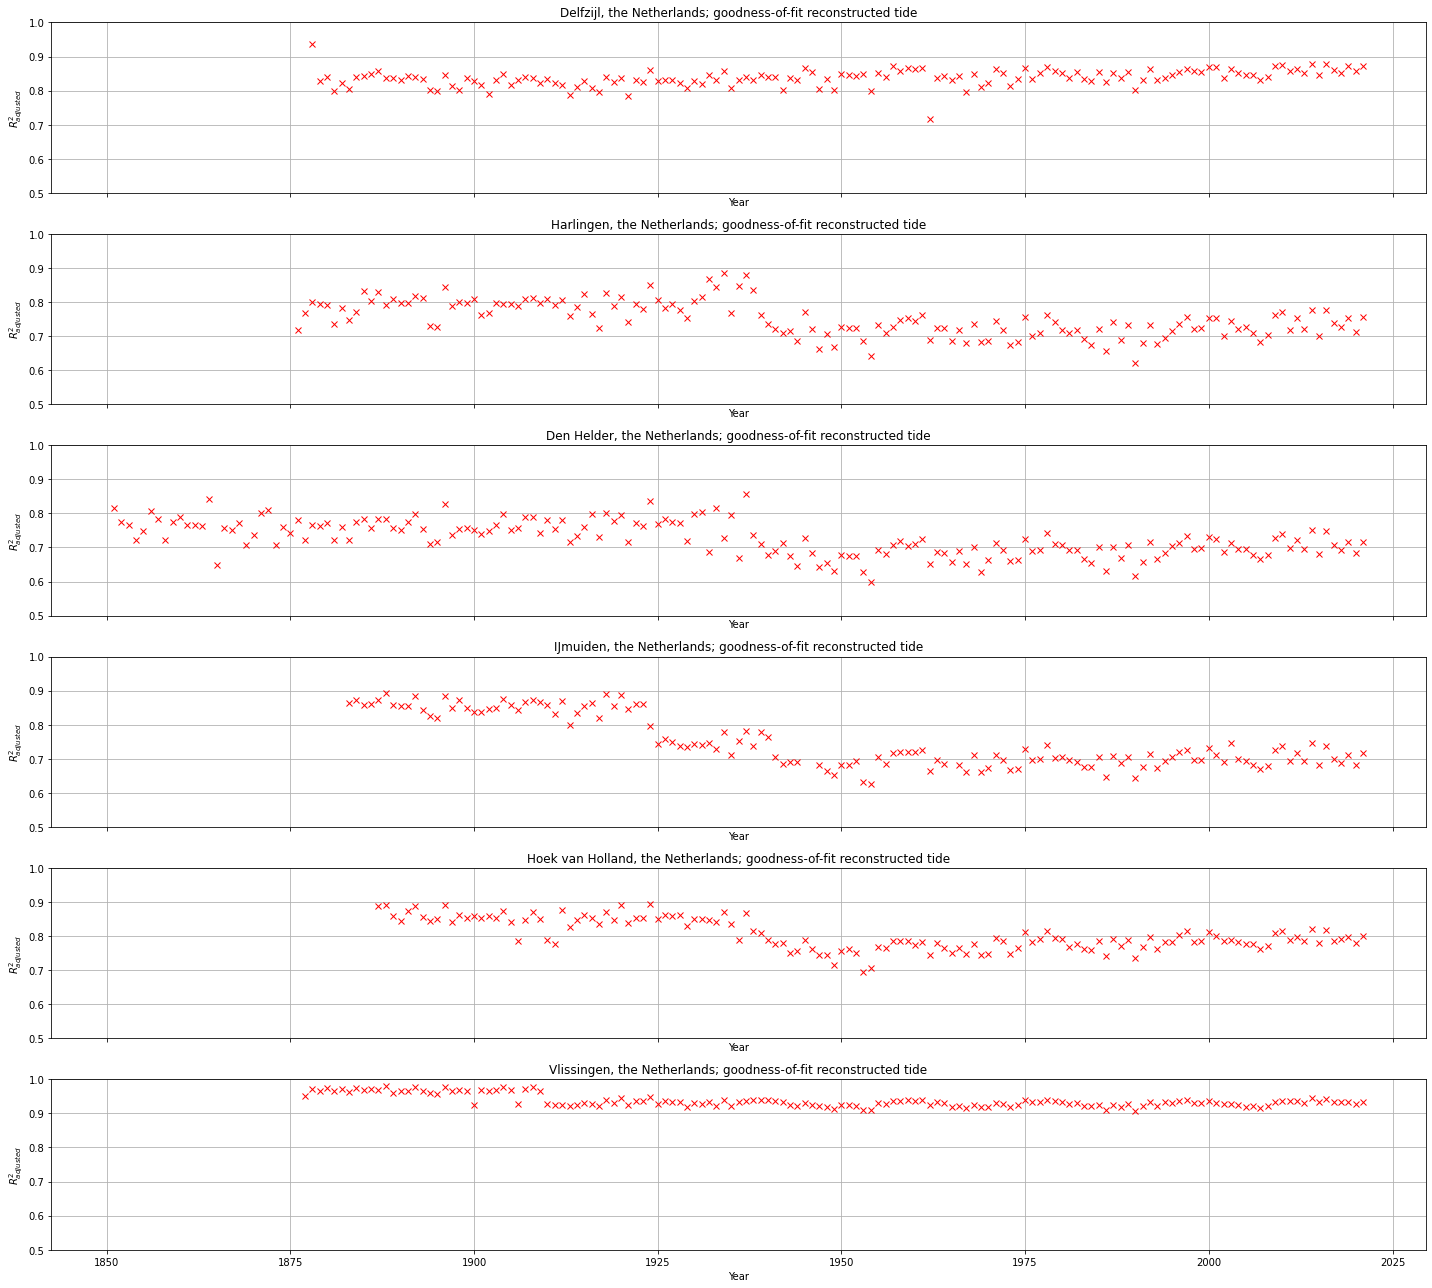

In [136]:
fig, ax = plt.subplots(nrows = 6, ncols = 1, sharex = True, sharey = True, figsize = figsize)
for i, nm in enumerate(names):
    data = df[df['naam'] == nm]
    ax[i].plot(
        data['year'], data['Rsq_adj'], 'rx'
    )

    ax[i].set_ylabel('$R^{2}_{adjusted}$')
    ax[i].set_xlabel('Year')
    #ax[i].legend()
    ax[i].title.set_text(nm + ", the Netherlands; goodness-of-fit reconstructed tide")
    ax[i].set_ylim(0.5, 1)
    #plt.xlim([1953, 1953.5])

#plt.legend()
plt.tight_layout()
plt.savefig(r'../pics/Rsq_all.jpg');

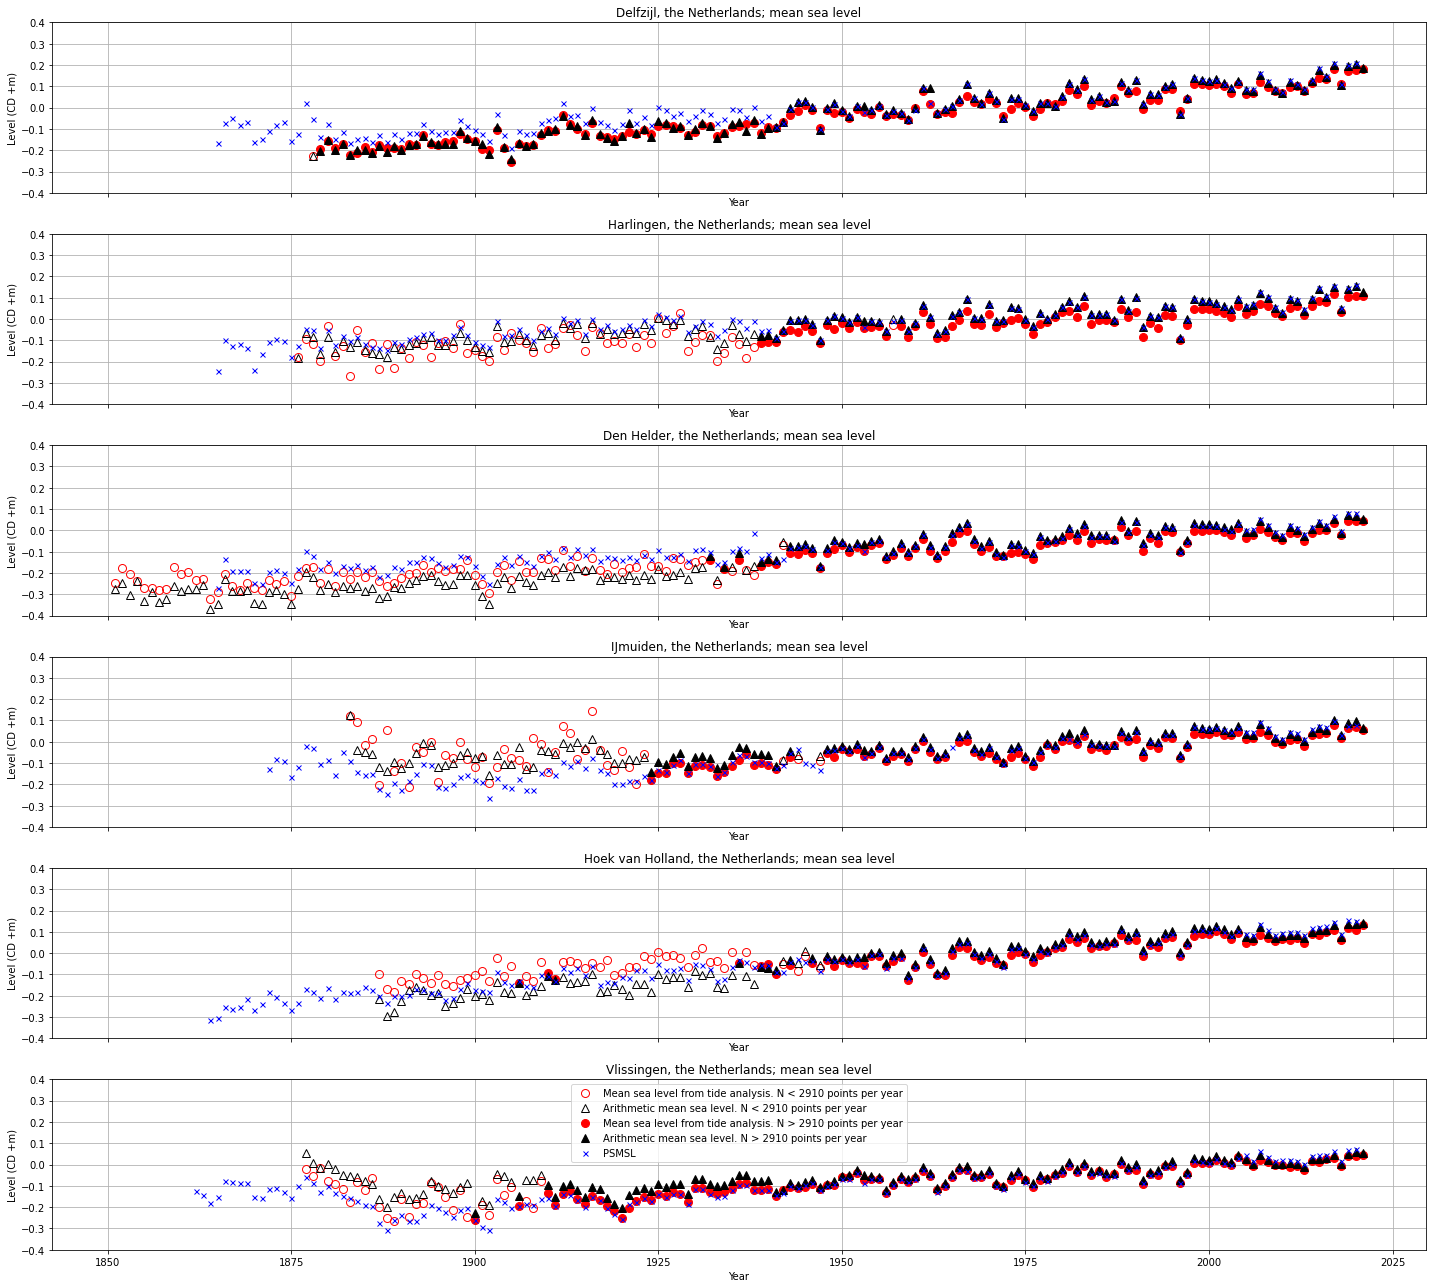

In [137]:
Nmn = 2910
fig, ax = plt.subplots(nrows = 6, ncols = 1, sharex = True, sharey = True, figsize = figsize)
for i, nm in enumerate(names):
    data = df[np.logical_and(df['naam'] == nm, df['count'] < Nmn)]

    ax[i].set_ylim([-0.4, 0.4])
    
    ax[i].plot(
        data['year'], data['z0'], 'ro', 
        label = 'Mean sea level from tide analysis. N < ' + str(Nmn) + ' points per year', 
        markersize = 8, mfc = 'none')    

    ax[i].plot(
        data['year'], data['zmean'], 'k^', 
        label = 'Arithmetic mean sea level. N < ' + str(Nmn) + ' points per year', 
        markersize = 8, mfc = 'none')

    data = df[np.logical_and(df['naam'] == nm, df['count'] >= Nmn)]
    
    ax[i].plot(
        data['year'], data['z0'], 'ro', 
        label = 'Mean sea level from tide analysis. N > ' + str(Nmn) + ' points per year', 
        markersize = 8)    

    ax[i].plot(
        data['year'], data['zmean'], 'k^', 
        label = 'Arithmetic mean sea level. N > ' + str(Nmn) + ' points per year', 
        markersize = 8)


    mn = data[data['year']>=1990]['zmean'].mean()
    data = psmsl[psmsl['name'] == nm.upper()]
    
    mn2 = data[data['time']>=1990]['level'].mean()
    delta = mn2 - mn

    ax[i].plot(
        data['time'], data['level'] - delta, 'bx', 
        label = 'PSMSL', 
        markersize = 5, mfc = 'none')
    ax[i].set_ylabel('Level (CD +m)')
    ax[i].set_xlabel('Year')
    ax[i].title.set_text(nm + ", the Netherlands; mean sea level")
    #plt.xlim([1953, 1953.5])
plt.legend()
plt.tight_layout()
plt.savefig(r'../pics/MSL_all.jpg');

#### Tides

C:\Users\Hessel Voortman\AppData\Local\Temp\ipykernel_12076\1665554088.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[df['count'] < Nmn]
C:\Users\Hessel Voortman\AppData\Local\Temp\ipykernel_12076\1665554088.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[df['count'] < Nmn]
C:\Users\Hessel Voortman\AppData\Local\Temp\ipykernel_12076\1665554088.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[df['count'] < Nmn]
C:\Users\Hessel Voortman\AppData\Local\Temp\ipykernel_12076\1665554088.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[df['count'] < Nmn]
C:\Users\Hessel Voortman\AppData\Local\Temp\ipykernel_12076\1665554088.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[df['count'] < Nmn]
C:\Users\Hessel Voortman\AppData\Local\Temp\ipykernel_12076\1665554088

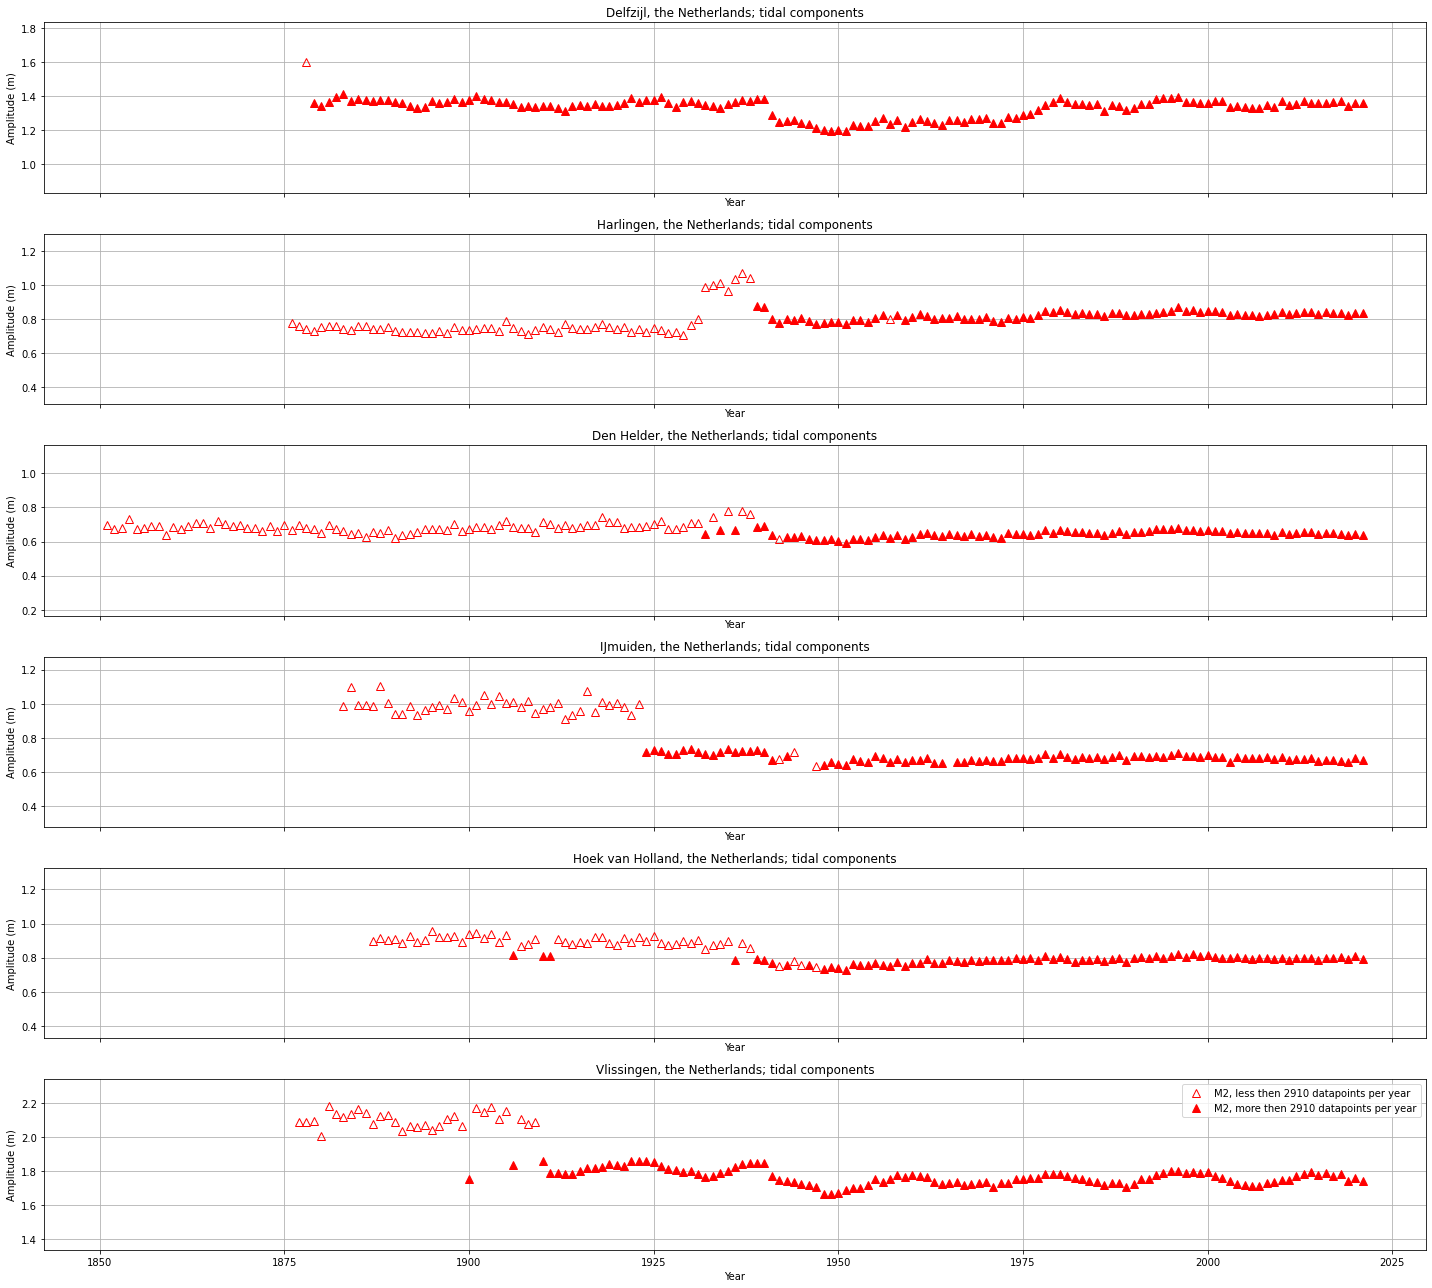

In [138]:
fig, ax = plt.subplots(nrows = 6, ncols = 1, sharex = True, sharey = False, figsize = figsize)
for i, nm in enumerate(names):
    data = df[df['naam'] == nm]
    
    mu = data['M2'].mean()

    data = data[df['count'] < Nmn]
    ax[i].plot(
        data['year'], data['M2'], 'r^', 
        label = 'M2, less then '+ str(Nmn) + ' datapoints per year', 
        markersize = 8, mfc = 'none')
    
    data = df[np.logical_and(df['naam'] == nm, df['count'] >= Nmn)]

    ax[i].plot(
        data['year'], data['M2'], 'r^', 
        label = 'M2, more then '+ str(Nmn) + ' datapoints per year', 
        markersize = 8)
    
    ax[i].set_ylabel('Amplitude (m)')
    ax[i].set_xlabel('Year')
    
    ax[i].title.set_text(nm + ", the Netherlands; tidal components")
    ax[i].set_ylim(mu-0.5, mu+0.5)#data['M2'].max())
ax[i].legend(loc = 'best')
plt.tight_layout()
plt.savefig(r'../pics/M2_all.jpg');

C:\Users\Hessel Voortman\AppData\Local\Temp\ipykernel_12076\1958149237.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[df['count'] < Nmn]
C:\Users\Hessel Voortman\AppData\Local\Temp\ipykernel_12076\1958149237.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[df['count'] < Nmn]
C:\Users\Hessel Voortman\AppData\Local\Temp\ipykernel_12076\1958149237.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[df['count'] < Nmn]
C:\Users\Hessel Voortman\AppData\Local\Temp\ipykernel_12076\1958149237.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[df['count'] < Nmn]
C:\Users\Hessel Voortman\AppData\Local\Temp\ipykernel_12076\1958149237.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[df['count'] < Nmn]
C:\Users\Hessel Voortman\AppData\Local\Temp\ipykernel_12076\1958149237

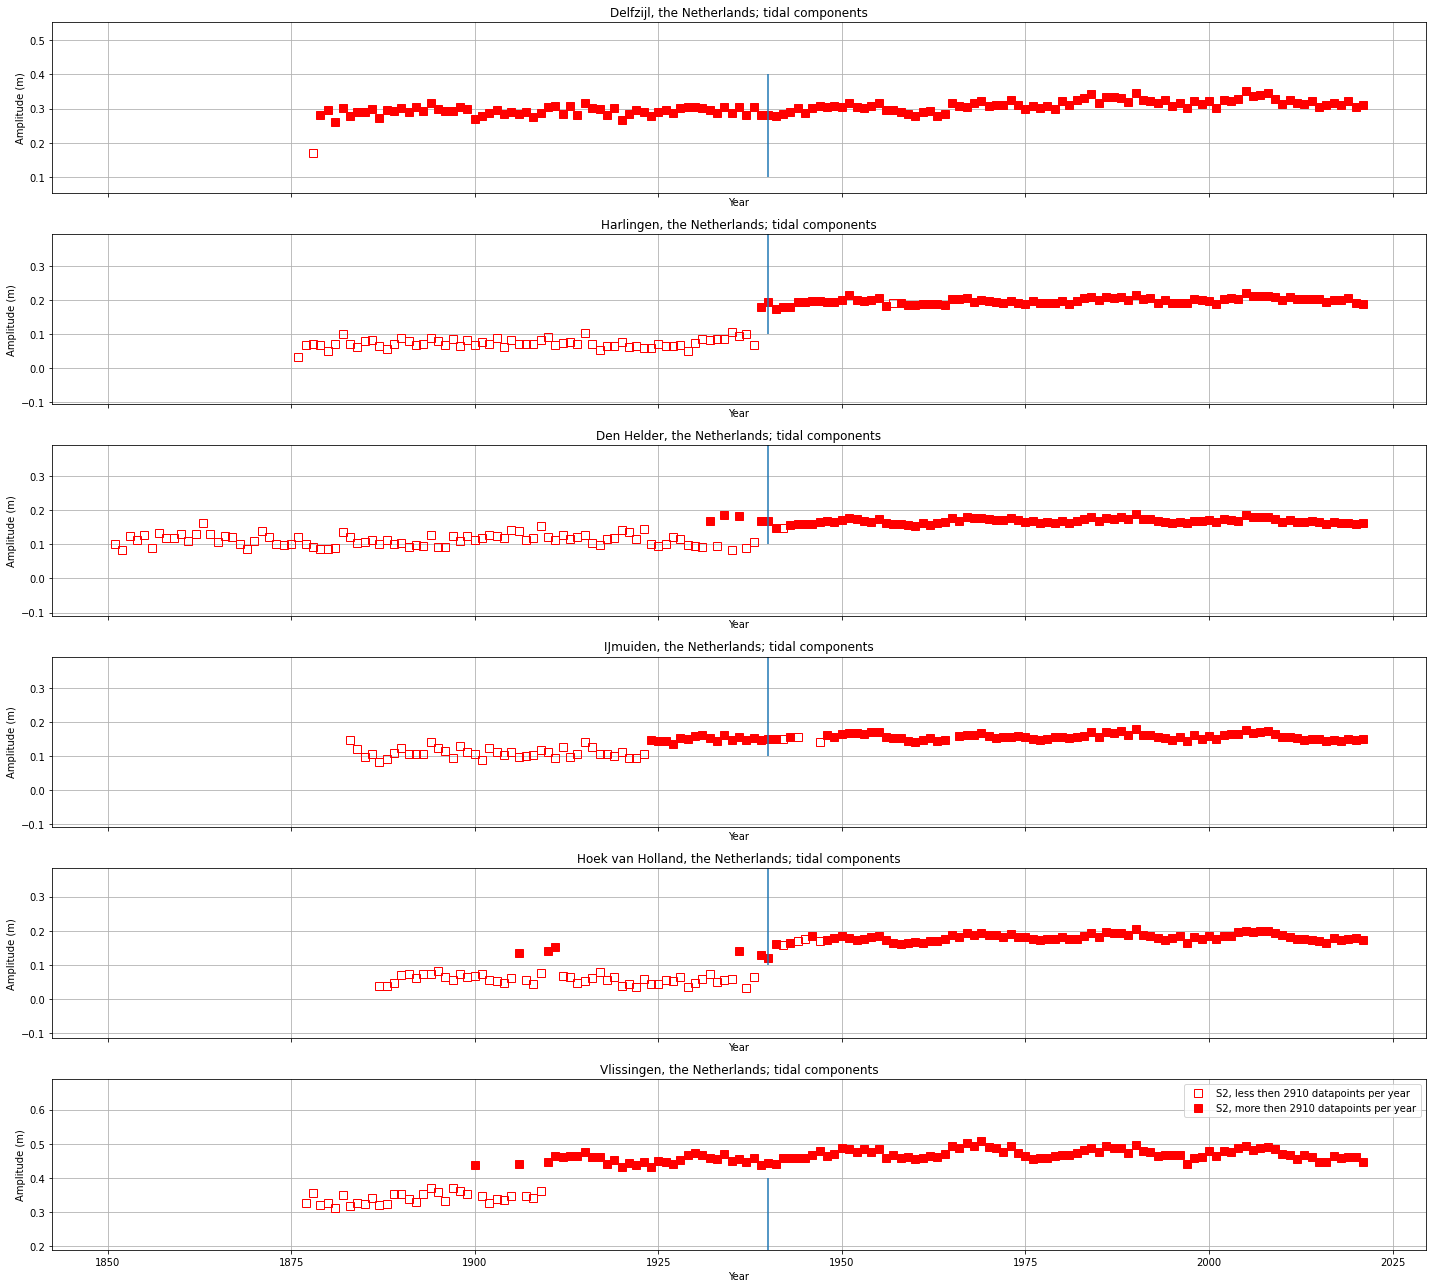

In [142]:
fig, ax = plt.subplots(nrows = 6, ncols = 1, sharex = True, sharey = False, figsize = figsize)
for i, nm in enumerate(names):
    data = df[df['naam'] == nm]
    
    mu = data['S2'].mean()

    data = data[df['count'] < Nmn]
    
    ax[i].plot(
        data['year'], data['S2'], 'rs', 
        label = 'S2, less then '+ str(Nmn) + ' datapoints per year', 
        markersize = 8, mfc = 'none')
    
    data = df[np.logical_and(df['naam'] == nm, df['count'] >= Nmn)]

    ax[i].plot(
        data['year'], data['S2'], 'rs', 
        label = 'S2, more then '+ str(Nmn) + ' datapoints per year', 
        markersize = 8)
    
    ax[i].set_ylabel('Amplitude (m)')
    ax[i].set_xlabel('Year')
    
    ax[i].title.set_text(nm + ", the Netherlands; tidal components")
    ax[i].set_ylim(mu-0.25, mu+0.25)#data['M2'].max())
    ax[i].vlines(x=1940, ymin = 0.1, ymax = 0.4)
ax[i].legend(loc = 'best')
plt.tight_layout()
plt.savefig(r'../pics/S2_all.jpg');

C:\Users\Hessel Voortman\AppData\Local\Temp\ipykernel_12076\442222358.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[df['count'] < Nmn]
C:\Users\Hessel Voortman\AppData\Local\Temp\ipykernel_12076\442222358.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[df['count'] < Nmn]
C:\Users\Hessel Voortman\AppData\Local\Temp\ipykernel_12076\442222358.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[df['count'] < Nmn]
C:\Users\Hessel Voortman\AppData\Local\Temp\ipykernel_12076\442222358.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[df['count'] < Nmn]
C:\Users\Hessel Voortman\AppData\Local\Temp\ipykernel_12076\442222358.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[df['count'] < Nmn]
C:\Users\Hessel Voortman\AppData\Local\Temp\ipykernel_12076\442222358.py:7:

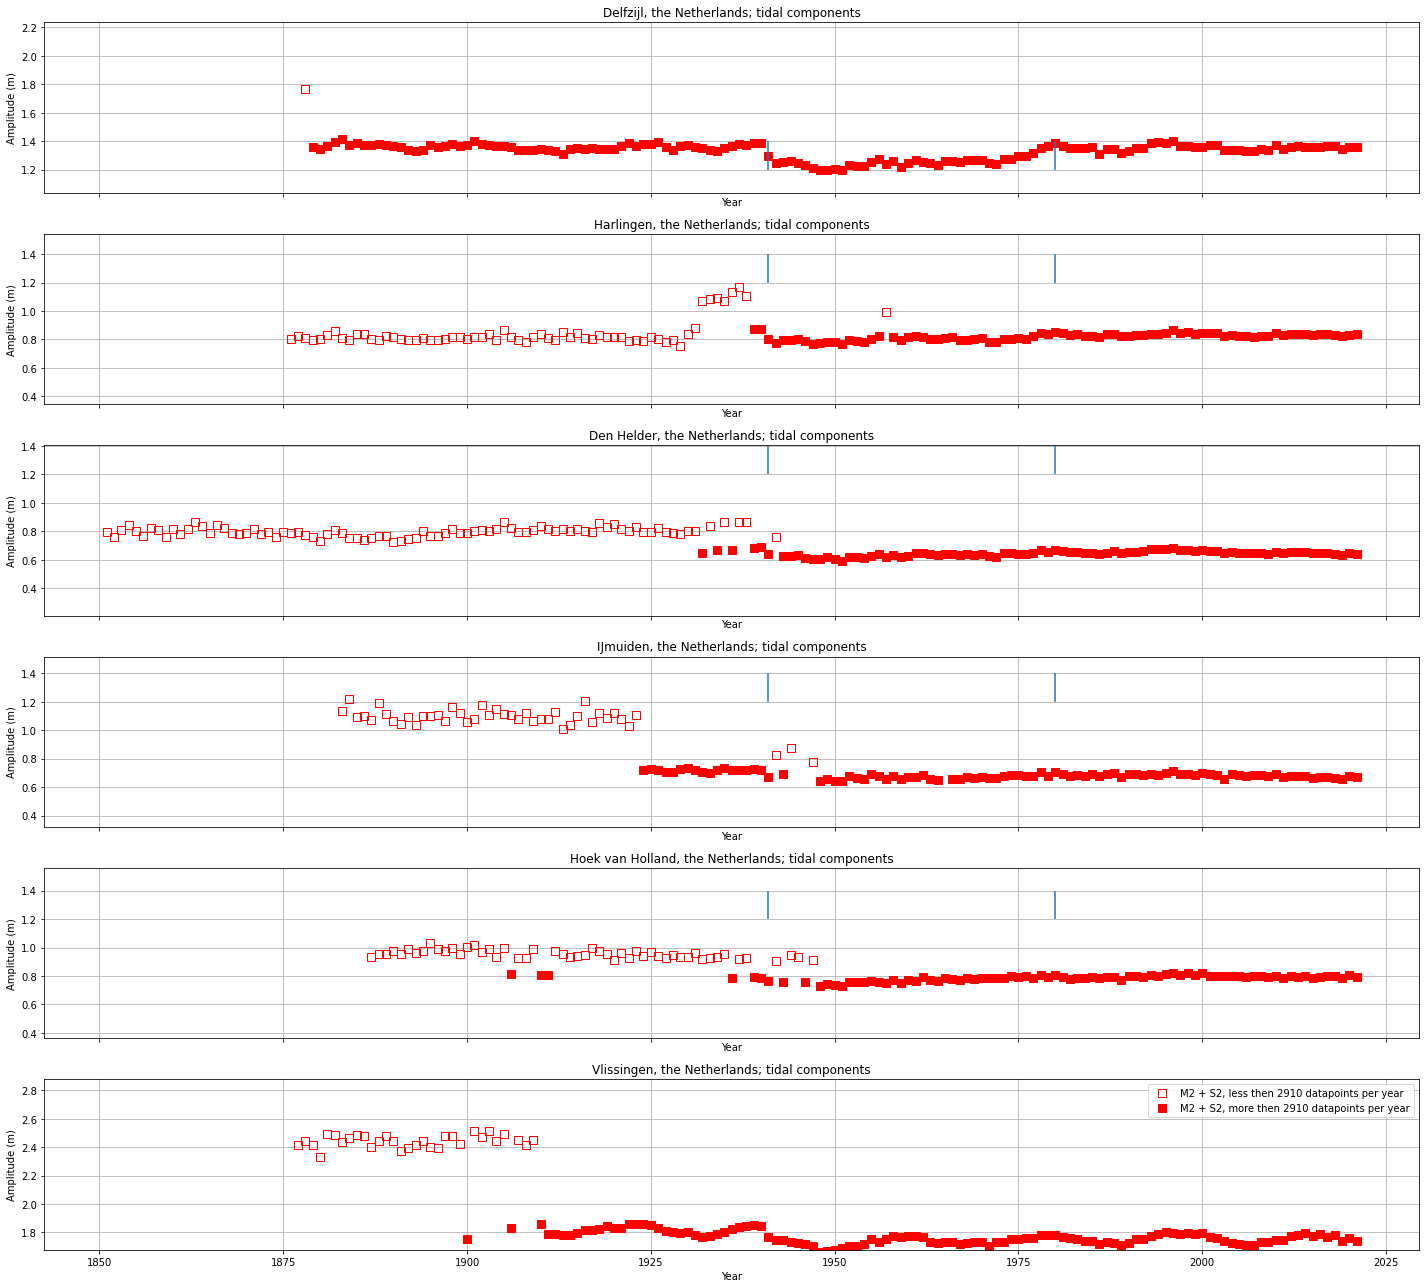

In [140]:
fig, ax = plt.subplots(nrows = 6, ncols = 1, sharex = True, sharey = False, figsize = figsize)
for i, nm in enumerate(names):
    data = df[df['naam'] == nm]
    
    mu = (data['M2'] + data['S2']).mean()

    data = data[df['count'] < Nmn]
    
    ax[i].plot(
        data['year'], data['M2'] + data['S2'], 'rs', 
        label = 'M2 + S2, less then '+ str(Nmn) + ' datapoints per year', 
        markersize = 8, mfc = 'none')
    
    data = df[np.logical_and(df['naam'] == nm, df['count'] >= Nmn)]

    ax[i].plot(
        data['year'], data['M2'], 'rs', 
        label = 'M2 + S2, more then '+ str(Nmn) + ' datapoints per year', 
        markersize = 8)
    
    ax[i].set_ylabel('Amplitude (m)')
    ax[i].set_xlabel('Year')
    
    ax[i].title.set_text(nm + ", the Netherlands; tidal components")
    ax[i].set_ylim(mu-0.6, mu+0.6)#data['M2'].max())
    ax[i].vlines(x = 1941, ymin = 1.2, ymax = 1.4)
    ax[i].vlines(x = 1980, ymin = 1.2, ymax = 1.4)
ax[i].legend(loc = 'best')
plt.tight_layout()
plt.savefig(r'../pics/M2+S2_all.jpg');

#### End script
Prepared by HVEC lab, 2022